In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("monthly_csv.csv")

In [4]:
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [5]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [6]:
df.shape

(847, 2)

# EDA

In [7]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [8]:
date = pd.date_range(start ="1/1/1950" , end="8/1/2020" , freq="M")
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [9]:
df["month"]=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


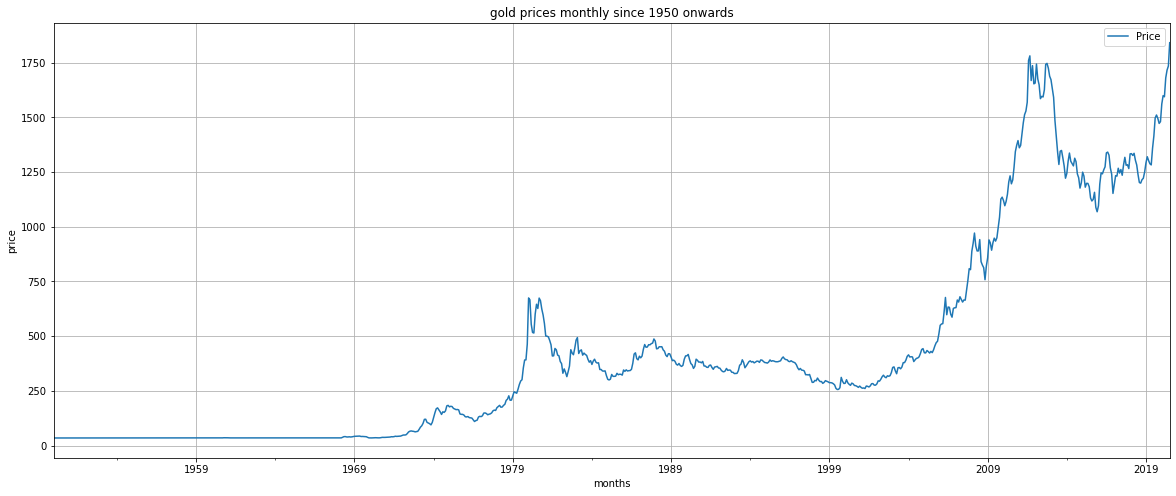

In [10]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.grid();

In [11]:
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


Visual Analysis

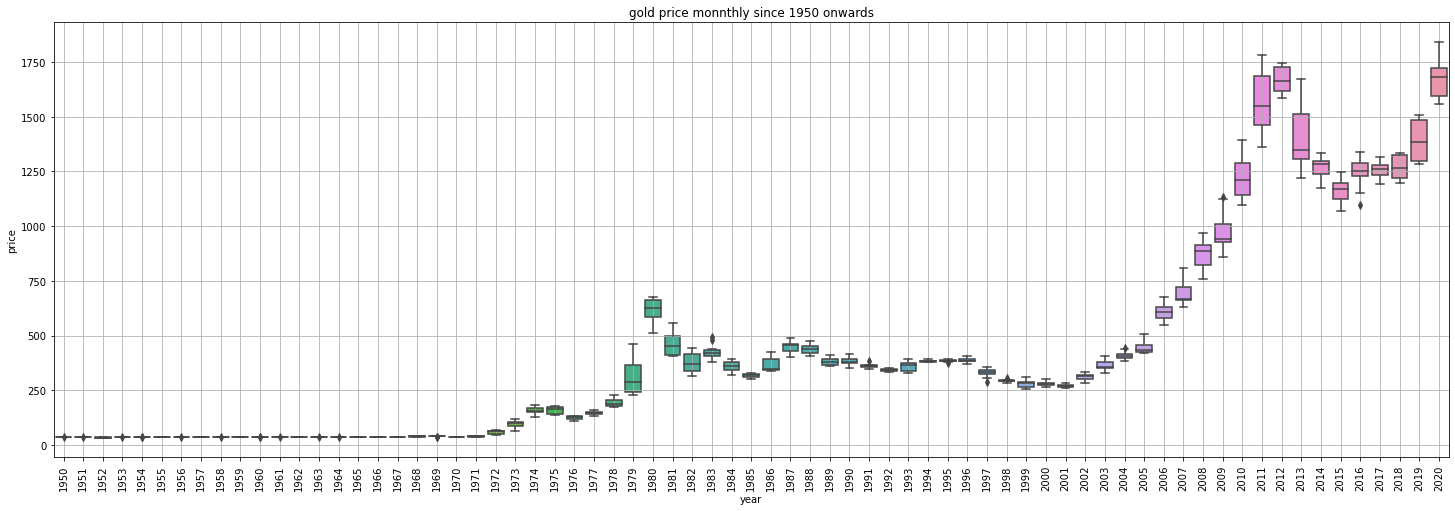

In [12]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x= df.index.year, y=df.values[:,0], ax=ax)
plt.title('gold price monnthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid();

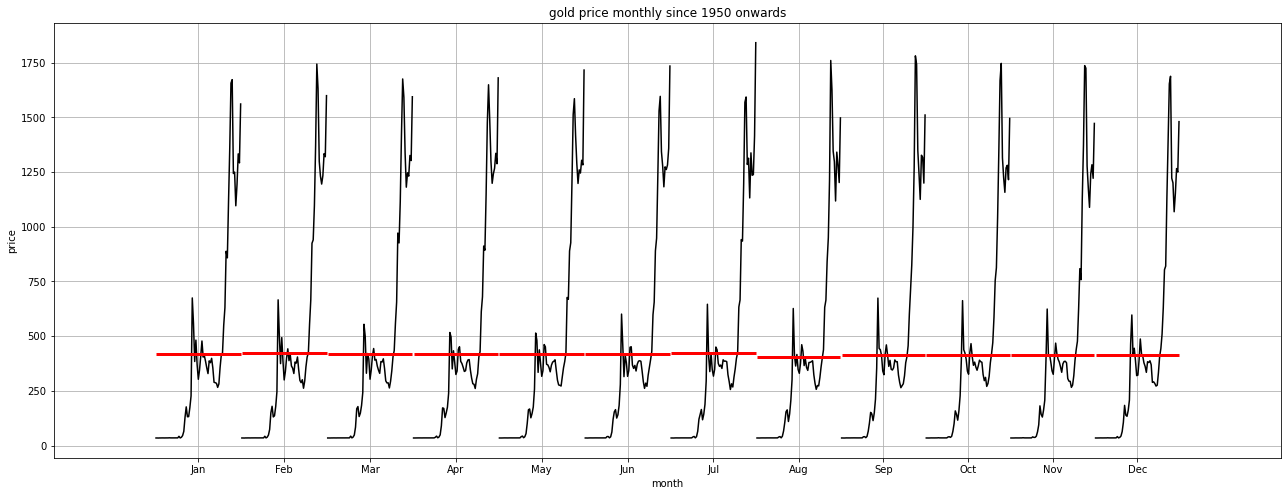

In [13]:
from statsmodels.graphics.tsaplots import month_plot


fig,ax=plt.subplots(figsize=(22,8))
month_plot(df, ylabel= 'gold price' , ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();

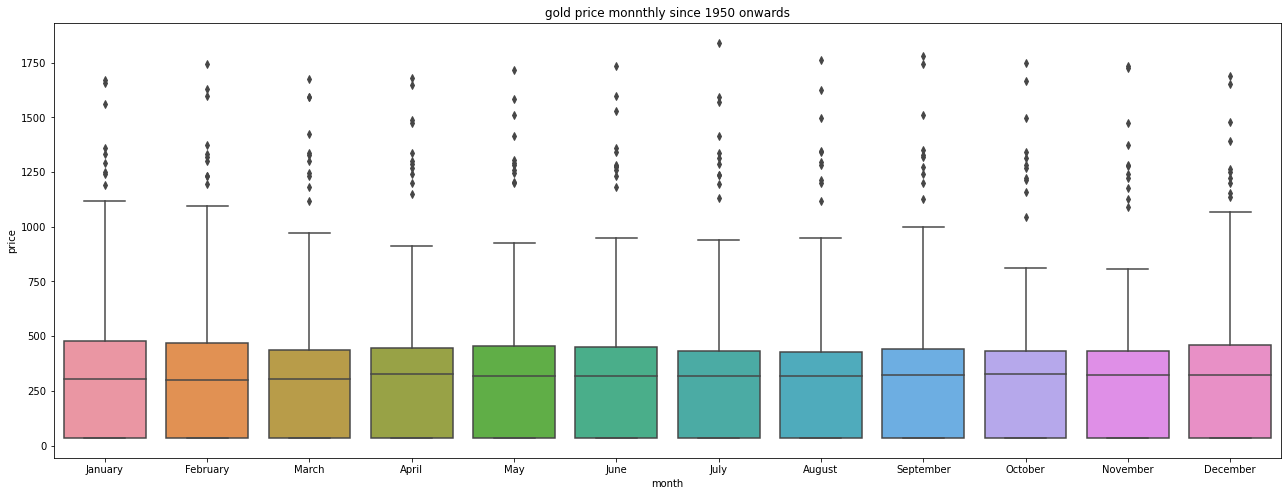

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x= df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('gold price monnthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.show();

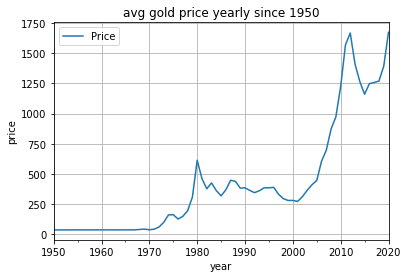

In [15]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot();
plt.title('avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

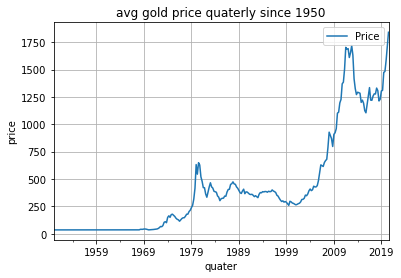

In [16]:
df_quaterly_sum=df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title('avg gold price quaterly since 1950')
plt.xlabel('quater')
plt.ylabel('price')
plt.grid();

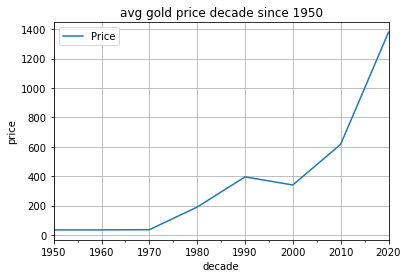

In [17]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('avg gold price decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid();

In [18]:
df_1=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1=df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['Cov_pct']=((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


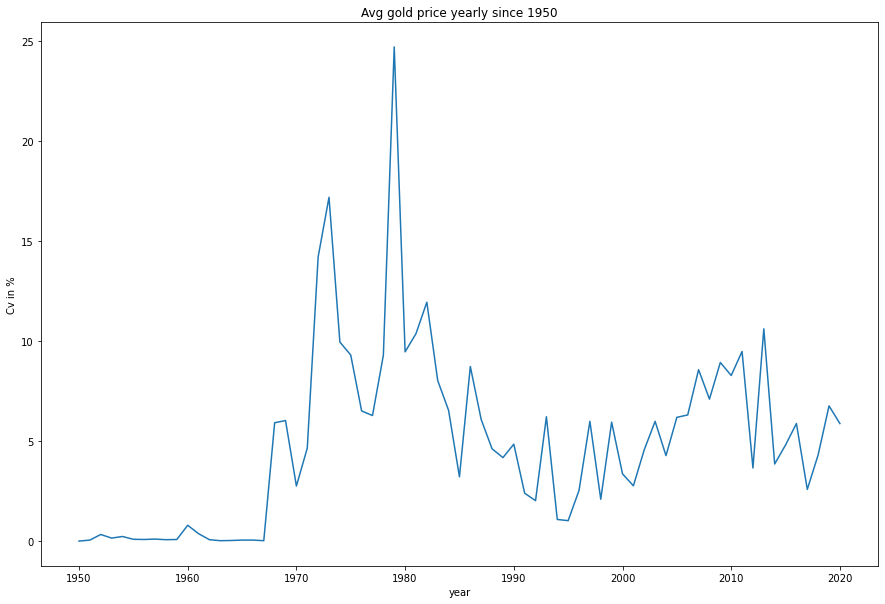

In [19]:
fig, ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();
plt.title('Avg gold price yearly since 1950') 
plt.xlabel('year')
plt.ylabel('Cv in %')
plt.show()

Time Series Forecasting 

In [20]:
train = df[df.index.year <= 2015]
test = df [df.index.year > 2015]

In [21]:
print (train.shape)
print(test.shape)

(792, 1)
(55, 1)


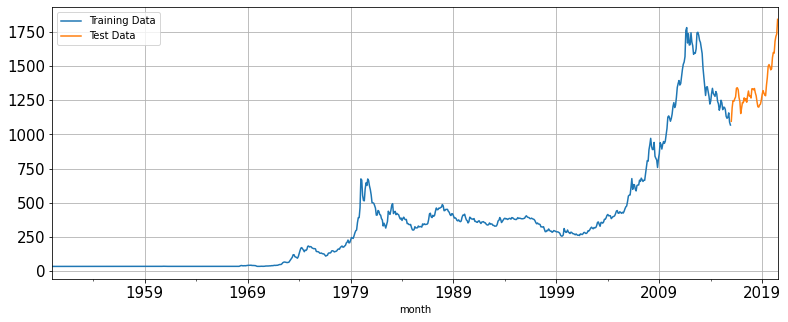

In [22]:
train['Price'].plot(figsize=(13,5), fontsize=15)
test['Price'].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model Building

Model1 = LinearRegression

In [23]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [24]:
LR_train=train.copy()
LR_test=test.copy()

In [25]:
LR_train["time"]=train_time
LR_test["time"]=test_time

In [26]:
lr=LinearRegression()

lr.fit(LR_train[['time']],LR_train["Price"].values)

LinearRegression()

In [27]:
test_predictions_model1=lr.predict(LR_test[["time"]])
LR_test['forecast']=test_predictions_model1




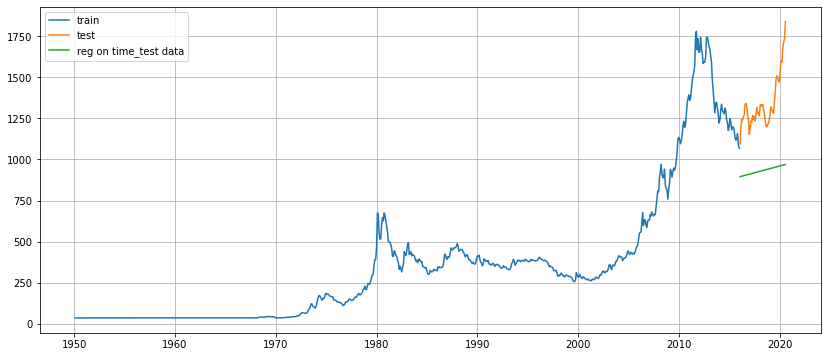

In [28]:
test_predictions_model1=lr.predict(LR_test[["time"]])
LR_test['forecast']=test_predictions_model1


plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc = 'best')
plt.grid();

In [29]:
def mape(actual, pred): 
    return round((np.mean(abs(actual - pred)/ actual))* 100, 2)

In [30]:
mape_model1_test= mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [31]:
results=pd.DataFrame({'Test MAPE (%)': [mape_model1_test]}, index=['RegressionOnTime'])
results

,Test MAPE (%)
RegressionOnTime,29.76


Model2 = Naive Bayes

In [32]:
Naive_train=train.copy()
Naive_test=test.copy()

In [33]:
Naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

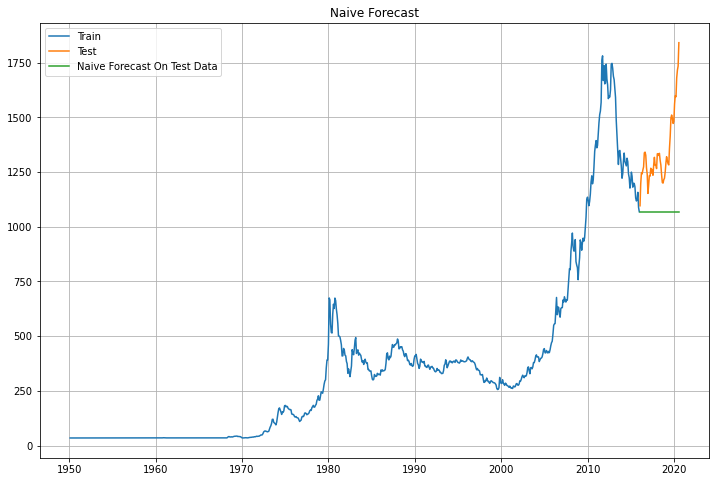

In [34]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(Naive_test['naive'], label='Naive Forecast On Test Data')
plt.legend(loc = 'best')
plt.title("Naive Forecast")
plt.grid();

In [35]:
mape_model2_test= mape(test['Price'].values,Naive_test['naive'].values)
print(" For Naive forecast on the Test Data, MAPE is %3.3f"%(mape_model2_test),"%")

 For Naive forecast on the Test Data, MAPE is 19.380 %


In [36]:
resultsDf_2 =pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['NaiveModel'])
results = pd.concat([results , resultsDf_2])
results

,Test MAPE (%)
RegressionOnTime,29.76
NaiveModel,19.38


Final Forecast

In [37]:
final_model = ExponentialSmoothing(df,trend= 'additive',seasonal='additive').fit(smoothing_level=0.4,smoothing_trend=0.3,smoothing_seasonal=0.6)

In [38]:
Mape_final_model=mape(df['Price'].values,final_model.fittedvalues)
print('MAPE:' , Mape_final_model)

MAPE: 17.24


In [39]:
predictions = final_model.forecast(steps=len(test))

In [51]:
pred_df=pd.DataFrame({'lower_CI' : predictions- 1.96*np.std(final_model.resid,ddof=1),'upper_CI': predictions+ 1.96*np.std(final_model.resid,ddof =1)})
                    

In [55]:
pred_df.head()

,lower_CI,upper_CI
2020-08-31,1684.718274,1901.020219
2020-09-30,1615.301815,1831.603760
2020-10-31,1538.560879,1754.862823
2020-11-30,1476.748832,1693.050776
2020-12-31,1459.315210,1675.617154


In [61]:
pred_df=pd.DataFrame({'lower_CI' : predictions- 1.96*np.std(final_model.resid,ddof=1),
                      'prediction': predictions,
                      'upper_CI': predictions+ 1.96*np.std(final_model.resid,ddof =1)})
                    

In [62]:
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


# Forecast graph along with the confidence mape

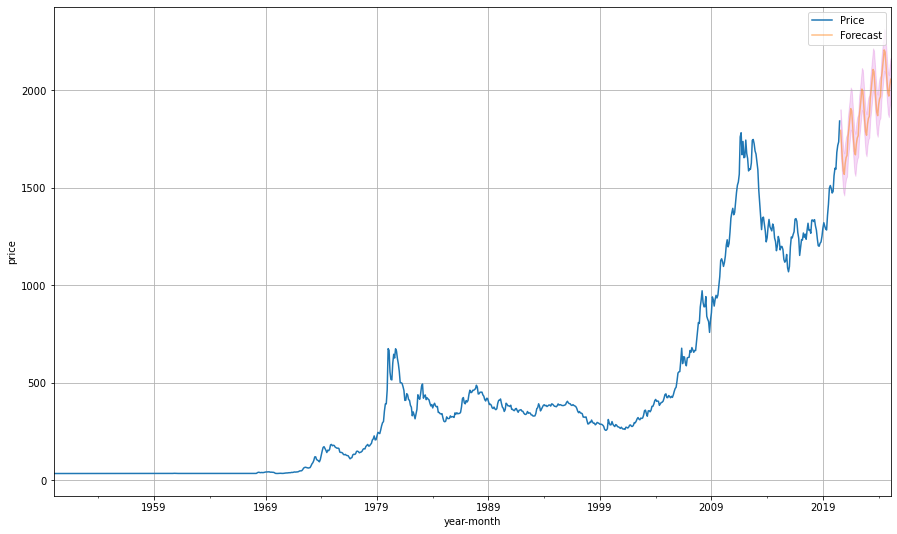

In [66]:
axis=df.plot(label = 'Actual' , figsize=(15,9))
pred_df['prediction'].plot(ax= axis, label = 'Forecast', alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_CI'],color='m',alpha=0.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()